# Bài thực hành Tuần 1 - Nhập môn máy học - Linear Regression
Họ và tên: Huỳnh Quang Trung

MSSV: 20280108

Ca thực hành: Ca 2

Bài làm được làm trên nền tảng Google Colab.

------

# Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


**Submission Link**: https://forms.gle/WKCJUp7noHAKALNP9 (Submit your .ipynb file)

In [ ]:
# mount data from google drive to colab
from google.colab import drive
drive.mount('/content/drive')

#import library
import pandas as pd # pandas
import numpy as np # numpy
import time
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [ ]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

In [ ]:
PATH = "/content/drive/MyDrive/NMMH/Tuan1/final_house_loan.csv"
df = read_dataset(PATH)

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


- Dựa vào các thông tin phía trên, ta có thể nhận xét được rằng giá trị tại các cột đều có giá trị dương, đúng theo logic của dữ liệu.
- Cột cuối cùng `Loan Sanction Amount (USD)` là cột target và các cột còn lại chính là các feature - là các biến đầu vào của mô hình.

## Data Analysis

In [ ]:
print(f'Bộ dữ liệu có {df.shape[0]} dòng và {df.shape[1]} cột.')

Bộ dữ liệu có 47297 dòng và 8 cột.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47297 entries, 0 to 47296
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      47297 non-null  object 
 1   Age                         47297 non-null  int64  
 2   Income (USD)                47265 non-null  float64
 3   Income Stability            47285 non-null  object 
 4   Property Age                47263 non-null  float64
 5   Property Location           47294 non-null  object 
 6   Property Price              47297 non-null  float64
 7   Loan Sanction Amount (USD)  47297 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.9+ MB


Có 3 thuộc mang kiểu dữ liệu object, đó chính là 3 cột mang tính phân loại (categorical)

In [ ]:
# Xem các thống kê mô tả của tập dữ liệu
df.describe()

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


In [ ]:
num_nan = df.isna().sum()
num_nan

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

Ta thấy có 4 cột tồn tại giá trị NaN là:
- Income (USD) với 32 giá trị khuyết
- Income Stability với 12 giá trị khuyết
- Property Age với 34 giá trị khuyết
- Property Location với 3 giá trị khuyết

**Quyết định sẽ bỏ đi các dòng dữ liệu này trong phần tiền xử lý dữ liệu**

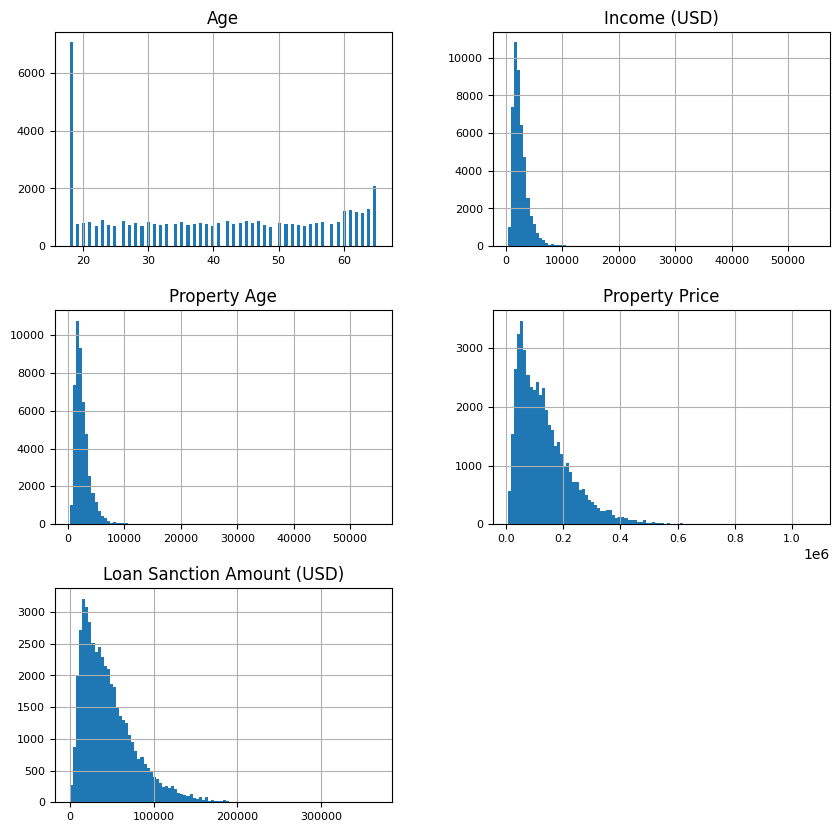

In [ ]:
# Xem histogram của các cột trong datafame
df.hist(figsize=(10,10), bins=100, xlabelsize=8, ylabelsize=8)
plt.show()

Cột Age, có giá trị bé nhất nhất là 18 và lớn nhất là 65 và thông qua đồ thị histogram phía trên thì có thể nhận xét rằng độ tuổi vay tiền phân bố khá đều từ 20 cho đến 65 tuổi. Đặc biệt, số lượng người dưới 20 tuổi vay tiền để mua nhà chiếm rất đông trong tập dữ liệu.

In [ ]:
# Ta xem tỉ lệ các bản ghi là người dưới 20 tuổi đi vay tiền trong tập dữ liệu
(df[df['Age'] < 20].shape[0]/df.shape[0])*100

16.588789986679917

Xấp xỉ 16.6%, đây là một con số khá cao. Nguyên nhân có thể là người ở độ tuổi này chưa có tài chính ổn định nên vì vậy họ thường lựa chọn giải pháp là vay tiền để có thể mua nhà.

Ngoài ra, từ các histogram phía trên, ta nhận thấy các cột đều bị lệch phải, các điểm dữ liệu đều tập trung phần lớn ở phía bên trái của histogram. Tại đây, ta có thể xem xét sử dụng kỹ thuật feature scaling để đưa các phân phối của những feature này về dạng phân phối chuẩn.

Ta sẽ xem giữa độ tuổi của ngôi nhà và giá tiền của ngô nhà sẽ có liên quan gì với nhau.

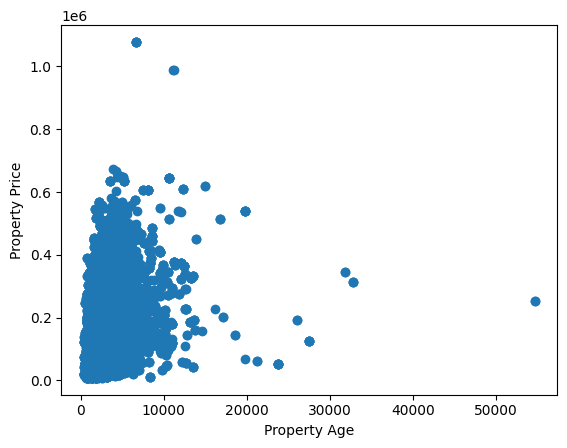

In [ ]:
plt.scatter(df['Property Age'], df['Property Price'])

plt.xlabel('Property Age')
plt.ylabel('Property Price')
plt.show()

Dựa vào biểu đồ phía trên thì ta có thể nhận xét được rằng, đa phần các ngôi nhà trong dataset đều có độ tuổi dưới 1000 ngày và các ngôi nhà có giá tiền cao đều tập trung vào nhóm này, cho thấy, có thể độ tuổi càng thấp, nhà càng mới thì giá tiền sẽ cao hơn. Và thực tế khi nhìn vào biểu đồ thì các ngôi nhà lớn hơn 1000 ngày tuổi đều có giá trị không cao bằng nhóm những ngôi nhà dưới 1000 ngày tuổi.

Xem mối quan hệ giữa giá trị căn nhà và số tiền được vay

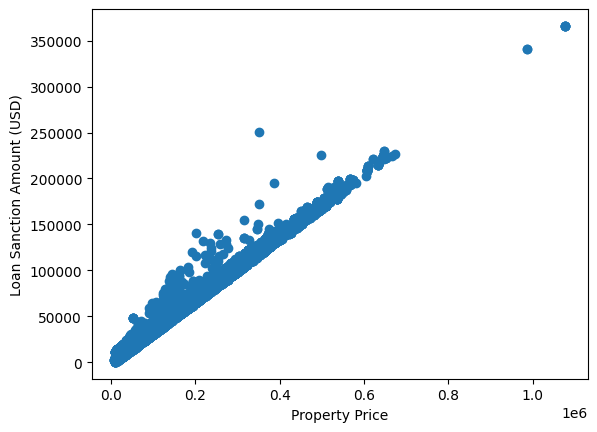

In [ ]:
plt.scatter(df['Property Price'], df['Loan Sanction Amount (USD)'])
plt.xlabel('Property Price')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()

Dựa vào biểu đồ trên thì ta cũng thấy Property Price và Loan Sanction Amount (USD) có quan hệ tuyến tính rất mạnh với nhau, nghĩa là giá tiền của căn nhà càng cao thì người đi vay sẽ được vay với số tiền càng lớn.

## Preprocessing

Ta sẽ tiến hành tiền xử lý dữ liệu bằng cách loại các dòng dữ liệu chứa giá trị NaN.

In [ ]:
def preprocessing_data(df):
    preprocessed_df = df.copy()
    preprocessed_df = preprocessed_df.dropna() # Loại bỏ các dòng có xuất hiện NaN
    return preprocessed_df

In [ ]:
preprocessed_data = preprocessing_data(df.copy())

In [ ]:
preprocessed_data.isna().sum()

Gender                        0
Age                           0
Income (USD)                  0
Income Stability              0
Property Age                  0
Property Location             0
Property Price                0
Loan Sanction Amount (USD)    0
dtype: int64

## Feature Engineering

In [ ]:
def feature_engineering(df):
    start_time = time.time()
    engineered_data = df.copy()
    engineered_data["Gender"] = engineered_data["Gender"].astype("category").cat.codes
    engineered_data["Income Stability"] = engineered_data["Income Stability"].astype("category").cat.codes
    engineered_data["Property Location"] = engineered_data["Property Location"].astype("category").cat.codes

    display(engineered_data.head())
    display(engineered_data.corr())
    print("Running time", time.time() - start_time)
    return engineered_data

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,1,1651.25,0,59641.82,21026.420753
1,1,29,1989.71,1,1990.71,2,179858.51,60595.183366
2,0,37,1849.91,1,1856.91,0,117297.62,39181.648002
3,1,65,2735.18,0,2747.18,0,354417.72,128497.710865
4,0,62,4741.78,0,4740.78,2,82049.80,39386.919336


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,0.007706,-0.002445,-0.019000,-0.002512,0.009142,0.005931,0.003396
Age,0.007706,1.000000,-0.044086,-0.455855,-0.044085,-0.007770,-0.003274,-0.000115
Income (USD),-0.002445,-0.044086,1.000000,0.080961,0.999986,-0.000199,0.358110,0.392897
Income Stability,-0.019000,-0.455855,0.080961,1.000000,0.081008,-0.001959,0.004813,-0.070969
Property Age,-0.002512,-0.044085,0.999986,0.081008,1.000000,-0.000233,0.358110,0.392892
Property Location,0.009142,-0.007770,-0.000199,-0.001959,-0.000233,1.000000,-0.000898,-0.001988
Property Price,0.005931,-0.003274,0.358110,0.004813,0.358110,-0.000898,1.000000,0.994429
Loan Sanction Amount (USD),0.003396,-0.000115,0.392897,-0.070969,0.392892,-0.001988,0.994429,1.000000


Running time 0.03332233428955078


<Axes: >

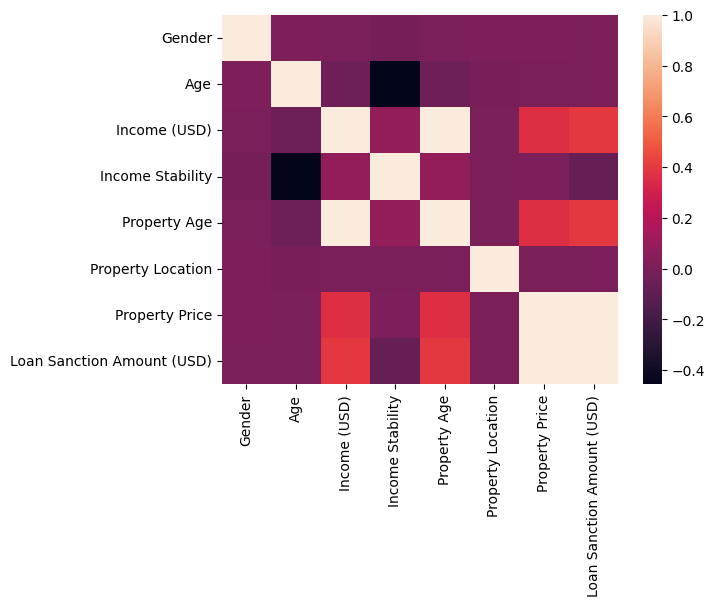

In [ ]:
# Heatmap
engineered_data = feature_engineering(preprocessed_data.copy())
sns.heatmap(engineered_data.corr()) # Show heatmap after normalized data

- Dựa vào đồ thị Heatmap phía trên, ta có thể nhận xét được rằng có 3 cột có độ trương quan mạnh với cột target, đó chính là `Income (USD)`, `Property Age` và `Property Price`. Có thể đoán được rằng đây chính là các đặc trưng sẽ ảnh hưởng đến kết quả dự đoán nhiều nhất. Tróng đó cột `Property Price` (giá tiền ngôi nhà) có độ tương quan cao nhất với target.
- Ngoài ra, 3 cột kể trên cũng có tương quan rất tốt với nhau.

# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    return X, y

X, y = prepare_X_y(engineered_data)

In [ ]:
def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=train_size, random_state=2002)
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

In [ ]:
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(33075, 7)
Test:(14176, 7)


## StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
trainX_scaled = scaler.fit_transform(trainX)
testX_scaled = scaler.transform(testX)

## Basic Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)
    return model

model = build_linear_model(trainX_scaled, trainY)
# Compare on training dataset
pred = model.predict(trainX_scaled)
print("mean absolute errortes of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY))
pred = model.predict(testX_scaled)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY))
print(model.score(testX_scaled, testY))

mean absolute errortes of linear model on train set  161.51789581553115
mean absolute error of linear model on test set  142.89879594046104
0.9987703774599445


In [ ]:
print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

[ -136.56588082 -1276.34871917   880.42125279 -3186.23957373
   700.32931071   -45.73741922 31883.7813439 ]

46499.81951186261


- Thông qua bảng thống kê mô tả của tập dữ liệu ở phần trước thì cột `Loan Sanction Amount (USD)` có trung bình là 46487.229765, độ lệch chuẩn là 32549.905634, min là 254.586578 và max là 366131.165218. Và trung bình sai số trên tập train là `161.51789581553115`, trên tập test là `142.89879594046104`. Như vậy các sai số trên ở trong ngưỡng chấp nhận được đối với cột target của chúng ta.
- Và với các hệ số coefficient ở trên, ta cũng đã chắc chắn được rằng, ba cột `Income (USD)`, `Property Age` và `Property Price` đã có vai trò giải thích tốt cho biến đầu ra, trong đó cột `Property Price` đóng vai trò quan trọng nhất với hệ số hồi quy lên tới 31883.7813439.

## Use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression

Ridge, Lasso, và ElasticNet là các mô hình hồi quy tuyến tính được sử dụng để giảm overfitting và tăng tính tổng quát của mô hình. Trong thư viện scikit-learn của Python, chúng ta có thể sử dụng các lớp Ridge, Lasso, và ElasticNet để xây dựng các mô hình này.

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

**Đầu tiên, ta sẽ sử dụng hồi quy Ridge, Lasso, và ElasticNet với các tham số mặc định do thư viện scikit-learn cung cấp để train model. Sau đó sẽ tìm hiểu cách điều chỉnh để có được các tham số tốt hơn.**

### Ridge

Mô hình Ridge Regression có thể được tối ưu hóa bằng cách tìm giá trị tối thiểu của loss function cộng với một lượng điều chuẩn được gọi là regularization. Thông thường, hàm regularization sử dụng chuẩn L2 của vector trọng số để đặt giới hạn trên trọng số của mô hình.

- Trường hợp alpha = 0 thành phần điều chuẩn bị tiêu giảm và chúng ta quay trở về bài toán hồi qui tuyến tính thông thường.

- Trường hợp alpha nhỏ thì vai trò của thành phần điều chuẩn trở nên ít quan trọng. Mức độ kiểm soát overfiting của mô hình sẽ trở nên kém hơn.

- Trường hợp alpha lớn chúng ta muốn gia tăng mức độ kiểm soát lên độ lớn của các hệ số ước lượng và qua đó giảm bớt hiện tượng overfiting.

Trong lớp Ridge của scikit-learn hệ số alpha mặc định sẽ là 1.

In [ ]:
# Ridge regression
ridge = Ridge(alpha = 1, fit_intercept=True) # default alpha = 1.0, fit_intercept=True
# Train ridge regression
ridge.fit(trainX_scaled, trainY)

ridge_pred_train = ridge.predict(trainX_scaled)
ridge_pred_test = ridge.predict(testX_scaled)

print(ridge.coef_)
print(ridge.intercept_)
print("mean absolute error of Ride model on train set ", mean_absolute_error(y_pred=ridge_pred_train, y_true=trainY))
print("mean absolute error of Ride model on test set ", mean_absolute_error(y_pred=ridge_pred_test, y_true=testY))
ridge.score(testX_scaled, testY)

[ -136.54676671 -1276.24254751   818.92723455 -3186.12246979
   762.18847166   -45.73654624 31882.68558178]
46499.81951186261
mean absolute error of Ride model on train set  161.11958442427104
mean absolute error of Ride model on test set  142.5017913234069


0.9987704540143153

### Lasso

Trong hồi qui Lasso, thay vì sử dụng thành phần điều chuẩn là norm chuẩn bậc hai thì chúng ta sử dụng norm chuẩn bậc 1. Các trường hợp của hệ số alpha cũng tương tự với hồi quy Ridge. Trong lớp Lasso của scikit-learn mặc định `alpha = 1`.

In [ ]:
# Lasso regression
lasso = Lasso(alpha = 1, fit_intercept=True) # default alpha = 1.0, fit_intercept=True
# Train lasso regression
lasso.fit(trainX, trainY)

lasso_pred_train = lasso.predict(trainX)
lasso_pred_test = lasso.predict(testX)

print(lasso.coef_)
print(lasso.intercept_)
print("mean absolute error of Lasso model on train set ", mean_absolute_error(y_pred=lasso_pred_train, y_true=trainY))
print("mean absolute error of Lasso model on test set ", mean_absolute_error(y_pred=lasso_pred_test, y_true=testY))
lasso.score(testX, testY)

[-2.69097039e+02 -7.90965786e+01  8.47113731e-01 -1.11324504e+04
  1.73781684e-01 -5.51622264e+01  3.36350172e-01]
11892.38244945134
mean absolute error of Lasso model on train set  161.83761464134088
mean absolute error of Lasso model on test set  143.23744054577514


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.726e+10, tolerance: 3.521e+09
  model = cd_fast.enet_coordinate_descent(


0.9987704201656331

### ElasticNet

Hồi qui Elastic Net là một mô hình hồi qui cho phép chúng ta kết hợp đồng thời cả hai thành phần điều chuẩn là norm chuẩn bậc 1 và norm chuẩn bậc 2 theo một kết hợp tuyến tính lồi.

`l1_ratio` là "mixing parameter" của ElasticNet, với `0 <= l1_ratio <= 1`. Đối với `l1_ratio = 0`, thì thành phần điều chuẩn hoàn toàn trở thành norm chuẩn bậc 2 và mô hình trở về Ride Regression, với `l1_ratio = 1` thì bài toán trở thành chuẩn bậc 1 và mô hình trở về Lasso Regression. Đối với `0 < l1_ratio < 1`, thì bộ điều chuẩn là sự kết hợp của chuẩn L1 và L2.

In [ ]:
# ElasticNet regression
enet = ElasticNet(alpha=1, l1_ratio=0.5, fit_intercept=True) # default alpha = 1, l1_ratio = 0.5
# Train elastic net regression
enet.fit(trainX, trainY)

enet_pred_train = enet.predict(trainX)
enet_pred_test = enet.predict(testX)

print(enet.coef_)
print(enet.intercept_)
print("mean absolute error of ElasticNet model on train set ", mean_absolute_error(y_pred=enet_pred_train, y_true=trainY))
print("mean absolute error of ElasticNet model on test set ", mean_absolute_error(y_pred=enet_pred_test, y_true=testY))
enet.score(testX, testY)

[-6.43679653e+01  4.72060153e-01  9.37925374e-01 -1.26743204e+03
 -3.94145212e-02 -1.45751548e+01  3.36992739e-01]
-184.57869060139637
mean absolute error of ElasticNet model on train set  1764.519075337934
mean absolute error of ElasticNet model on test set  1732.735288634642


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.574e+11, tolerance: 3.521e+09
  model = cd_fast.enet_coordinate_descent(


0.9928532730670755

Ta thấy ở mô hình này cho ra sai số khá lớn so với các mô hình còn lại, vì vậy thay vì sử dụng các tham số của mô hình như mặc định, ta sẽ tìm các tham số khác nhằm mục đích tối ưu kết quả.

Đây là các tài liệu chính thức của Ridge, Lasso và ElasticNet trong thư viện scikit-learn của Python:

- Ridge Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- Lasso Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
- ElasticNet Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

### Điều chỉnh hệ số cho mô hình hồi qui tuyến tính Ridge, Lasso và Elastic Net

Cross-validation là một kỹ thuật trong machine learning để đánh giá hiệu suất của mô hình trên dữ liệu huấn luyện. Khi áp dụng cross-validation, dữ liệu huấn luyện được chia thành các tập con (folds) và mô hình được huấn luyện trên các tập con này theo thứ tự khác nhau. Đối với mỗi lần huấn luyện, mô hình được đánh giá trên tập dữ liệu kiểm tra (test set) là tập con chưa được sử dụng để huấn luyện. Kết quả đánh giá được ghi nhận và trung bình để cho ra kết quả đánh giá cuối cùng của mô hình.

Cross-validation giúp giảm thiểu tình trạng overfitting khi đánh giá hiệu suất của mô hình trên dữ liệu huấn luyện, đồng thời cũng giúp tăng độ chính xác của kết quả đánh giá. Cross-validation là một công cụ quan trọng trong quá trình tối ưu hóa mô hình và chọn ra mô hình tốt nhất.

#### Điều chỉnh tham số alpha cho phương pháp Ride.

`RidgeCV` là một lớp của sklearn trong Python, được sử dụng để xây dựng mô hình Ridge Regression với tham số alpha được tối ưu hóa bằng cách sử dụng cross-validation

In [ ]:
from sklearn.linear_model import RidgeCV
# Khởi tạo RidgeCV
alphas = np.arange(0.1, 20, 0.1).tolist()
ridge_cv = RidgeCV(alphas, cv=5)

# Sử dụng phương thức fit để huấn luyện mô hình
ridge_cv.fit(trainX, trainY)

# Lấy giá trị alpha tốt nhất
best_alpha = ridge_cv.alpha_
print('Best alpha:', best_alpha)
ridge_cv_pred_train = ridge_cv.predict(trainX)
ridge_cv_pred_test = ridge_cv.predict(testX)

print('Coefficients:', ridge_cv.coef_)
print('Intercept: ', ridge_cv.intercept_)

print("mean absolute error of Ridge model on train set (with cross-validation )", mean_absolute_error(y_pred=ridge_cv_pred_train, y_true=trainY))
print("mean absolute error of Ridge model on test set (with cross-validation) ", mean_absolute_error(y_pred=ridge_cv_pred_test, y_true=testY))
ridge_cv.score(testX, testY)

Best alpha: 0.1
Coefficients: [-2.73124369e+02 -7.92255191e+01  5.68843144e-01 -1.11478762e+04
  4.52233908e-01 -5.67159765e+01  3.36349326e-01]
Intercept:  11914.773001269343
mean absolute error of Ridge model on train set (with cross-validation ) 161.53078154966082
mean absolute error of Ridge model on test set (with cross-validation)  142.91227857891246


0.9987703760293118

#### Điều chỉnh tham số alpha cho phương pháp Lasso.

`LassoCV` là một lớp của sklearn trong Python, được sử dụng để xây dựng mô hình hồi quy tuyến tính với kỹ thuật Lasso Regression và tham số alpha được tối ưu hóa bằng cách sử dụng cross-validation.

In [ ]:
from sklearn.linear_model import LassoCV
alphas = np.arange(0.1, 100, 0.1).tolist()
# tạo đối tượng LassoCV với một số tham số tùy chọn
lasso_cv = LassoCV(alphas = alphas, cv = 5)

# huấn luyện mô hình trên dữ liệu Boston
lasso_cv.fit(trainX, trainY)

# in ra giá trị alpha tốt nhất
print("Best alpha:", lasso_cv.alpha_)

print(lasso_cv.coef_)
print(lasso_cv.intercept_)

lasso_cv_pred_train = lasso_cv.predict(trainX)
lasso_cv_pred_test = lasso_cv.predict(testX)

print("mean absolute error of Lasso model on train set (with cross-validation )", mean_absolute_error(y_pred=lasso_cv_pred_train, y_true=trainY) )
print("mean absolute error of Lasso model on test set (with cross-validation) ", mean_absolute_error(y_pred=lasso_cv_pred_test, y_true=testY) )

lasso_cv.score(testX, testY)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2819911407.928131, tolerance: 2811576865.635014
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2852853424.886307, tolerance: 2811576865.635014
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2911924999.1578064, tolerance: 2811576865.635014
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWa

Best alpha: 0.1
[-2.72785766e+02 -7.92152990e+01  8.47067138e-01 -1.11467344e+04
  1.74002711e-01 -5.65674404e+01  3.36349388e-01]
11913.009282389045
mean absolute error of Lasso model on train set (with cross-validation ) 161.5713095101765
mean absolute error of Lasso model on test set (with cross-validation)  142.9725352835625


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.109e+10, tolerance: 3.521e+09
  model = cd_fast.enet_coordinate_descent(


0.9987703759827009

#### Điều chỉnh tham số cho mô hình ElasticNet.

`ElasticNetCV` trong sklearn sử dụng kỹ thuật Cross-Validation để tìm giá trị tối ưu của hai siêu tham số alpha và l1_ratio trong mô hình ElasticNet.

Theo tài liệu của ElasticNetCV lựa chọn tốt về danh sách các giá trị cho `l1_ratio` thường là đặt nhiều giá trị gần với 1 (tức là Lasso) và ít gần 0 hơn (tức là Ridge), ví dụ trong [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1].

In [ ]:
from sklearn.linear_model import ElasticNetCV

alphas = np.arange(0.1, 100, 0.1).tolist()
l1_ratio = np.arange(0.1, 0.99, 0.01).tolist()
elas_cv = ElasticNetCV(alphas = alphas, l1_ratio = l1_ratio, cv=5, random_state=0) # running time about 3 minutes

# Huấn luyện mô hình
elas_cv.fit(trainX, trainY)

# Hiển thị kết quả
print("Coefficients:", elas_cv.coef_)
print("Intercept:", elas_cv.intercept_)
print('Best alpha = ', elas_cv.alpha_)
print('Best l1_ratio = ', elas_cv.l1_ratio_)

print()

elas_cv_pred_train = elas_cv.predict(trainX)
elas_cv_pred_test = elas_cv.predict(testX)

print("mean absolute error of ElasticNet model on train set (with cross-validation )", mean_absolute_error(y_pred=elas_cv_pred_train, y_true=trainY))
print("mean absolute error of ElasticNet model on test set (with cross-validation) ", mean_absolute_error(y_pred=elas_cv_pred_test, y_true=testY))
elas_cv.score(testX, testY)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10170302594.063324, tolerance: 2828300156.493302
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10258354613.366486, tolerance: 2828300156.493302
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10347306039.437988, tolerance: 2828300156.493302
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/l

KeyboardInterrupt: ignored

Ta có nhận xét như sau:
- Khi sử dụng kỹ thuật Ridge và Lasso thì trung bình sai số cho ra vẫn có kết quả tương đương với khi ta sử dụng Linear regression thông thường, vẫn có sai số tuy nhiên rất ít. Sau khi ta sử dụng RidgeCV và LassoCV để tìm ra các tham alpha tốt nhất để điều chỉnh 2 mô hình thì kết quả của trung bình sai số thu được vẫn không có thay đổi gì đáng kể (rất ít).
- Khi sử dụng kỹ thuật ElasticNet, nếu ta sử dụng với các tham số mặc định từ scikit-learn thì sai số thu được đã tăng trên cả tập train data và test data và nó cao hơn khi ta sử dụng Linear Regression bình thường. Nhưng khi ta dùng lớp ElasticNetCV để điều chỉnh và tìm ra các tham số tốt nhất cho mô hình thì sai số trung bình ở tập train và test đã được giảm xuống rất nhiều. Và đây cũng là mô hình có trung bình sai số nhỏ nhất trong tất cả các model đã train từ đầu cho đến bây giờ.

Tài liệu tham khảo chính thức của:
- RidgeCV: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

- LassoCV: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

- ElasticNetCV: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html

## Polynomial Transform

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [ ]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model =  make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
    poly_model.fit(X, y)

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

Khi ta dùng đa thức bậc 2, mô hình cho ra kết quả có vẻ tốt hơn các kết quả phía trước khi dùng hàm tuyến tính thông thường để train model với trung bình sai số trên cả tập train và test đã được giảm xuống thấp nhất cho đến bây giờ.

Ta thử tiếp với đa thức bậc 3

In [ ]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model =  make_pipeline(PolynomialFeatures(3, include_bias=False), LinearRegression())
    poly_model.fit(X, y)

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

Trung bình sai số đã bắt đầu tăng lên ở cả 2 tập test và train, nhưng vẫn còn trong ngưỡng chấp nhận được.

**Thử Polynomial với bậc cao hơn**

In [ ]:
# Thử Polynomial với bậc cao hơn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model =  make_pipeline(PolynomialFeatures(6, include_bias=False), LinearRegression())
    poly_model.fit(X, y)

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

Khi ta chọn bậc là 6, thì sai số trên tập train là 193.77823060715068 và trung bình sai số trên tập test là 221.1049897504846. Đây là dấu hiệu của hiện tượng overfiting và thực tế là khi sử dụng hàm bậc 8 thì sai số trên tập train là 296.33276281543965 và sai số trên tập test lên tới 2640.751368304582.

Việc sử dụng một hàm quá phức tạp so với dữ liệu để huấn luyện mô hình, có thể xảy ra hiện tượng overfitting, dẫn đến mô hình không hoạt động tốt trên tập dữ liệu mới. Điều này xảy ra do mô hình đã học quá nhiều chi tiết trong tập huấn luyện, bao gồm cả những chi tiết nhiễu dẫn đến việc mô hình không có tính tổng quát hóa.


Trong trường hợp phía trên, có vẻ như mô hình đã cho ra kết quả khá tốt với đa thức bậc 2 và bậc 3 so với khi ta sử dụng 1 hàm tuyến tính bình thường để xây dựng mô hình.

Tài liệu chính thức của Polynomial Transform: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

### Tổng kết

- Tìm hiểu bộ dữ liệu bằng cách làm các thống kê mô tả hay trực quan hóa, phân tích bộ dữ liệu bằng các biểu đồ để tìm ra mối quan hệ giữa các biến hay để hiểu bộ dữ liệu hơn cũng là một bước quan trọng, khi dựa vào các thông tin này ta có thể đưa ra nhận định về các biến đầu vào quan trọng có thể đưa vào mô hình hoặc có hướng xử lý tiếp theo.
- Trước khi dùng Linear Regression thì chúng ta nên có các kỹ thuật như tiền xử lý dữ liệu, biến đổi các biến đầu vào sao cho phù hợp với mô hình. Có thể dùng các kỹ thuật như feature scaling, normalize data sao cho phù hợp với tập dataset đang có.
- Hồi quy Ridge, Lasso và Elastic là các kỹ thuật tránh hiện tượng overfitting bằng cách cộnng thêm vào hàm loss fuction một bộ điều chuẩn tương ứng (regularization). Và khi sử dụng các kỹ thuật này, ta cần tinh chỉnh các tham số để tìm ra bộ siêu tham số là tốt nhất với tập dữ liệu.
- Khi dùng phương pháp Polynomial và chọn đúng bậc của đa thức thì có thể cải thiện được chất lượng của mô hình so với khi dùng hàm tuyến tính thông thường. Tuy nhiên, khi dùng đa thức bậc quá cao, mô hình trở nên quá phức tạp đối với tập dữ liệu thì có thể dẫn đến hiện tượng overfiting, do đó nên cân nhắc và tìm hiểu kỹ bộ dữ liệu, từ đó đưa ra quyết định đúng đắn nhất.